In [4]:
!pip install numpy pandas matplotlib watermark torch

  Using cached numpy-1.26.0-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached pandas-2.1.1-cp39-cp39-win_amd64.whl (10.8 MB)
  Using cached matplotlib-3.8.0-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached watermark-2.4.3-py2.py3-none-any.whl (7.6 kB)
                                              0.0/192.2 MB ? eta -:--:--
                                              0.0/192.2 MB ? eta -:--:--
                                              0.0/192.2 MB ? eta -:--:--
                                              0.0/192.2 MB ? eta -:--:--
                                            0.1/192.2 MB 762.6 kB/s eta 0:04:12
                                            0.1/192.2 MB 521.8 kB/s eta 0:06:09
                                            0.2/192.2 MB 980.4 kB/s eta 0:03:16
                                            0.2/192.2 MB 915.1 kB/s eta 0:03:30
                                              0.3/192.2 MB 1.2 MB/s eta 0:02:41
                                              0.4/192.2 MB


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import torch

df = pd.read_csv("./../perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [19]:
X_train = torch.from_numpy(df[["x1", "x2"]].values).to(torch.float32)
y_train = torch.from_numpy(df["label"].values).to(torch.float32)

In [8]:
def train(model, all_x, all_y, epochs):

    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        if error_count == 0:
            break

        print(f"Epoch {epoch + 1} errors {error_count}")

In [20]:
class Perceptron:

    def __init__(self, num_features: int):
        self.num_features = num_features
        self.weights = torch.rand(num_features).to(torch.float32)
        self.bias = torch.tensor(0.0)
        self.learning_rate = torch.tensor(0.1)


    def forward(self, x):

        weighted_sum_z = torch.dot(x, self.weights) + self.bias
        prediction = torch.where(weighted_sum_z > 0.0, 1.0, 0.0)
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)

        error = true_y - prediction

        #update
        self.bias += error
        self.weights += self.learning_rate * error * x

        return error

In [21]:
ppn = Perceptron(num_features=2)

train(model=ppn, all_x=X_train, all_y=y_train, epochs=50)

Epoch 1 errors 1.0


In [22]:
def compute_accuracy(model, all_x, all_y):

    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [23]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [24]:
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x1_max, x2_min, x2_max

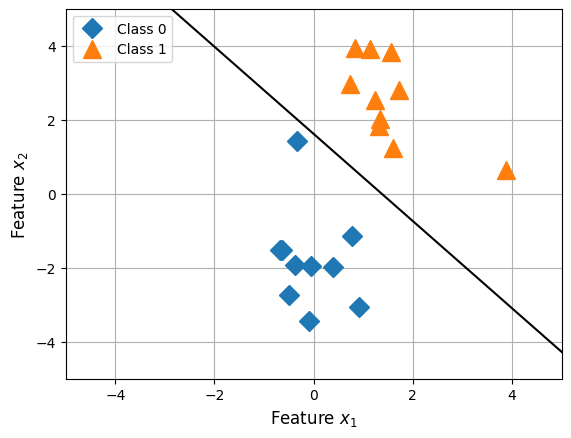

In [25]:
import matplotlib.pyplot as plt

x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()
